### Método de Simpson

$$ \int_{a}^{b} f(x) \, dx \approx \tfrac{b-a}{6}\left[f(a) + 4f\left(\tfrac{a+b}{2}\right)+f(b)\right], $$


__Ejercicio 3:__ Implementar método de Simpson de la misma forma que el ejercicio anterior.

In [1]:
function integralSimpson(f,a,b,n)
    h = (b-a)/n # se separarán nuestros intervalos un valor h
    x=zeros(1,n) # aquí se guardarán los nuevos valores de los segmentos
    x[1]=a
    integral=0.0
    for i in 2:n # empezamos en 2 ya que el elemento 1 se anexo arriba
        x[i]=x[i-1] + h
        #aplicamos el método de Simpson
        integral=integral + ((x[i]-x[i-1])/6)*(f(x[i-1])+4*f((x[i-1]+x[i])/2)+f(x[i]))
    end
    integral
end
;

In [2]:
f(x)=x^3-4x^2

f (generic function with 1 method)

El valor exacto de la integral de esa función en un intervalo de $[0,3]$ es $\frac {-63}{4} = -15.75$

In [3]:
integralSimpson(f,0.0,3.0,100)

-15.478694797499957

## Ejercicio 4: 
Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: Interpolador(listx,listy,x).



__Tip:__ Pueden hacer separadamente la rutina para $l_j(x)$, luego la de $L(x)$ utilizando la rutina que ya tenemos para $l_j(x)$. Por Ej: `funciondelabase(j,listx,x)`, donde $x$ es el lugar donde evaluamos la función interpoladora.

In [4]:
using SymPy

In [5]:
X=Sym("X")
function interpolacion_Lagrange(x,y,X)     # la lista de las x, la lista de las y y el punto simbólico X
    X=Sym("X")   
    n=length(x)  #número de elementos en las listas
    L = 0           
    for j in 1:n    
        p_numerador=1   
        p_denominador=1 
        for i in 1:n  
            if j !== i   
          #condición importante para las multiplicaciones  del numerador y el denominador
            p_numerador = p_numerador*(X-x[i])
            p_denominador = p_denominador*(x[j]-x[i])
            end
        end
    L = L + (p_numerador/p_denominador)*y[j]  #se van sumando a L el producto de la base polinomial de Lagrange 
    L=simplify(L)    
end 
L  #va a mostrar el método de interpolación de Lagrange   
end

interpolacion_Lagrange (generic function with 1 method)

Interpole las funciones $\cos(x)$, tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [6]:
x=linspace(0.0,2*pi,10.0) #tomamos los 10 puntos
y=cos.(x)  #los puntos y, dependen de los x

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [7]:
#obtenemos el polinomio de interpolación
interpolacion_Lagrange(x,y,X)

                      9                       8                         7     
6.83047368665868e-18*X  - 1.9797933636022e-5*X  + 0.000497576342935509*X  - 0.

                   6                        5                       4         
00411366974808167*X  + 0.00878850466173803*X  + 0.0243778891541633*X  + 0.0201

              3                     2                              
425548286519*X  - 0.51254334976388*X  + 0.00313254720752185*X + 1.0

In [32]:
interpolar=lambdify(interpolacion_Lagrange(x,y,X)) 
#pasamos a una función de Julia para poder graficar

listax = linspace(0,2pi,100)
listay = interpolar(listax)

100-element Array{Float64,1}:
 1.0     
 0.957281
 0.924683
 0.897247
 0.87118 
 0.843699
 0.812886
 0.777561
 0.737157
 0.691614
 0.64128 
 0.586824
 0.529154
 ⋮       
 0.586824
 0.64128 
 0.691614
 0.737157
 0.777561
 0.812886
 0.843699
 0.87118 
 0.897247
 0.924683
 0.957281
 1.0     

In [9]:
using PyPlot

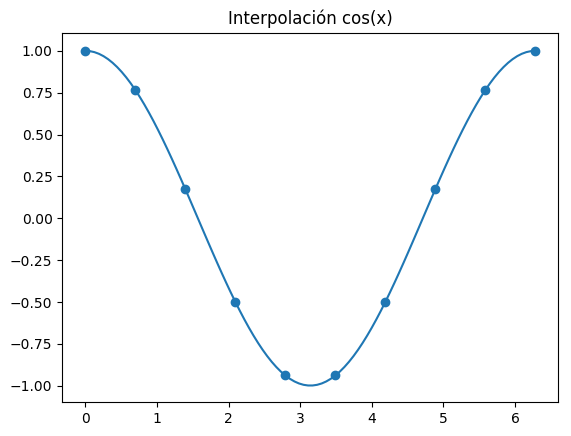

In [10]:
title("Interpolación cos(x)")
scatter(x,y)
plot(listax,listay)
show()

Interpole las funciones $\cos^2(x)$ , tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [11]:
function coseno_2(x)
    cos(x)*cos(x)
    end;

In [12]:
# obtenemos el arreglo de los 10 puntos 
x=linspace(0,2pi,10)
y=coseno_2.(x)

10-element Array{Float64,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [13]:
#sacamos el polinomio de interpolación
interpolacion_Lagrange(x,y,X)

                        9                        8                      7     
- 4.66206934168767e-18*X  + 0.00125598518133163*X  - 0.031566350549511*X  + 0.

                 6                     5                     4                
313492883032336*X  - 1.54753813738561*X  + 3.89900431361713*X  - 4.56959608798

     3                     2                            
489*X  + 2.02232704563067*X  - 0.784017877200963*X + 1.0

In [33]:
interpolar1=lambdify(interpolacion_Lagrange(x,y,X))
lista1x=linspace(0,2pi,100)
lista1y=interpolar1(lista1x)

100-element Array{Float64,1}:
 1.0     
 0.957281
 0.924683
 0.897247
 0.87118 
 0.843699
 0.812886
 0.777561
 0.737157
 0.691614
 0.64128 
 0.586824
 0.529154
 ⋮       
 0.586824
 0.64128 
 0.691614
 0.737157
 0.777561
 0.812886
 0.843699
 0.87118 
 0.897247
 0.924683
 0.957281
 1.0     

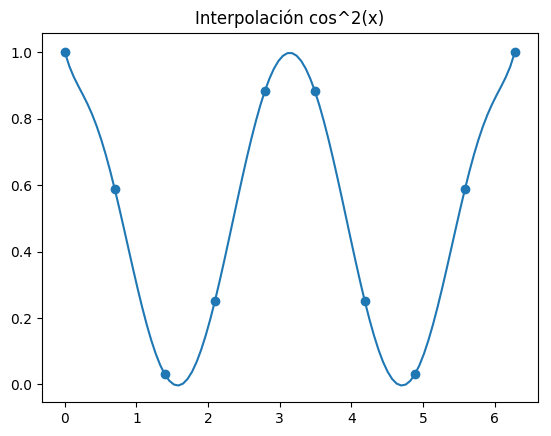

In [15]:
title("Interpolación cos^2(x)")
scatter(x,y)
plot(lista1x,lista1y)
show()

Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.

In [16]:
#La lista de puntos a interpolar
X=[0,2,3,4,5,6,7]
Y=[10,-10,-4,0,5,20,-1]
;

In [17]:
#polinomio de interpolación
interpolacion_Lagrange(X,Y,X)

       6        5         4         3          2            
  173*X    113*X    4957*X    2731*X    54571*X    83*X     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

In [18]:
interpolar2=lambdify(interpolacion_Lagrange(X,Y,X))
lista2x=linspace(0,7,100)
lista2y=interpolar2(lista2x)

100-element Array{Float64,1}:
 10.0     
 10.2139  
 10.0604  
  9.59978 
  8.88731 
  7.97299 
  6.90205 
  5.71518 
  4.44876 
  3.13511 
  1.80274 
  0.476596
 -0.821768
  ⋮       
 22.3472  
 22.6606  
 22.6842  
 22.3634  
 21.6385  
 20.4442  
 18.7095  
 16.3572  
 13.3038  
  9.45907 
  4.72596 
 -1.0     

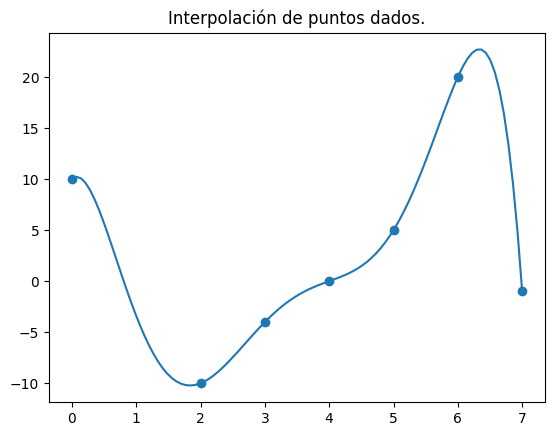

In [19]:
title("Interpolación de puntos dados.")
scatter(X,Y)
plot(lista2x,lista2y)
show()

# Ejercicio 5:
Comparen como convergen los métodos al valor exacto de la integral, respecto al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.

In [20]:
function f(x)
    -(sin(x))
end
;

In [21]:
#límites superior e inferior de integración
a=0
b=2pi
;

In [22]:
function integracion_Riemann(f,a,b)
    lista=zeros(100) #se almacenarán el valor para cada ciclo de la integral
    for n in 1:100 #obtendremos 100 datos
        suma=0
        h=(b-a)/n
        x=zeros(1,n) #vamos a obtener los valores de los intervalos
        x[1]=a
        for i in 2:n
            x[i]=x[i-1]+h #obtendremos los valores inferior y superior de los intervalos 
            suma= suma+(x[i]-x[i-1])*f((x[i-1]+x[i])/2) #método de Riemann
        end
        lista[n]=suma
    end
    lista
end
;

In [23]:
integracion_Riemann(f,a,b);

In [24]:
#Guardamos los datos obtenidos 
metodo1=[-3.14159, -1.8138, -1.11072, -0.738633, -0.523599, -0.389453, -0.300559, -0.238775, -0.194161, -0.160925, -0.135517, -0.115667, -0.0998672, -0.0870898, -0.0766118, -0.0679137, -0.0606146, -0.0544304, -0.0491453, -0.0445933, -0.040645, -0.0371983, -0.0341717, -0.0314997, -0.029129, -0.027016, -0.0251248, -0.0234252, -0.0218924, -0.0205051, -0.0192456, -0.0180986, -0.0170512, -0.016092, -0.0152115, -0.0144014, -0.0136542, -0.0129638, -0.0123243, -0.0117311, -0.0111796, -0.0106661, -0.0101872, -0.00973984, -0.0093213, -0.00892916, -0.00856125, -0.00821561, -0.00789049, -0.00758429, -0.00729556, -0.00702302, -0.00676546, -0.00652181, -0.00629109, -0.0060724, -0.00586491, -0.00566788, -0.00548061, -0.00530247, -0.00513287, -0.00497128, -0.00481721, -0.00467018, -0.00452979, -0.00439563, -0.00426734, -0.00414459, -0.00402706, -0.00391446, -0.00380651, -0.00370297, -0.00360359, -0.00350817, -0.00341648, -0.00332834, -0.00324357, -0.00316199, -0.00308346, -0.00300781, -0.00293492, -0.00286464, -0.00279685, -0.00273145, -0.00266831, -0.00260734, -0.00254843, -0.00249149, -0.00243644, -0.0023832, -0.00233168, -0.00228182, -0.00223354, -0.00218677, -0.00214146, -0.00209754, -0.00205496, -0.00201366, -0.0019736];

In [25]:
function integracion_Trapecio(f,a,b)
    lista1=zeros(100) #valores de cada ciclo de la integral
    for n in 1:100
        h=(b-a)/n  
        suma=0.0
        x=zeros(1,n)
        x[1]=a
        for i in 2:n
            x[i]=x[i-1]+h #se obtiene el nuevo límite inferior y superior de los intervalos
            suma=suma+((x[i]-x[i-1]))*((f(x[i-1])+f(x[i]))/2)  #método de Trapecio
        end
        lista1[n]=suma
    end
    lista1
end
;

In [26]:
integracion_Trapecio(f,a,b);

In [27]:
#Guardamos los datos obtenidos 
metodo2=[-1.92367e-16, -0.9069, -0.785398, -0.597566, -0.45345, -0.350885, -0.27768, -0.224375, -0.184658, -0.154407, -0.1309, -0.112305, -0.0973633, -0.0851867, -0.0751397, -0.0667573, -0.0596938, -0.0536881, -0.0485403, -0.0440953, -0.0402313, -0.0368518, -0.0338793, -0.0312513, -0.0289166, -0.0268334, -0.0249668, -0.0232879, -0.0217725, -0.0203999, -0.0191529, -0.0180167, -0.0169784, -0.0160272, -0.0151537, -0.0143495, -0.0136076, -0.0129217, -0.0122863, -0.0116966, -0.0111483, -0.0106377, -0.0101613, -0.00971612, -0.00929957, -0.00890922, -0.00854292, -0.00819873, -0.00787492, -0.0075699, -0.00728225, -0.00701068, -0.00675401, -0.00651117, -0.00628119, -0.00606318, -0.00585631, -0.00565984, -0.0054731, -0.00529544, -0.00512628, -0.00496511, -0.00481141, -0.00466473, -0.00452466, -0.0043908, -0.00426279, -0.00414029, -0.004023, -0.00391062, -0.00380289, -0.00369954, -0.00360035, -0.00350509, -0.00341356, -0.00332557, -0.00324094, -0.00315949, -0.00308108, -0.00300555, -0.00293276, -0.00286259, -0.0027949, -0.00272958, -0.00266653, -0.00260564, -0.0025468, -0.00248994, -0.00243496, -0.00238178, -0.00233032, -0.00228052, -0.00223229, -0.00218558, -0.00214031, -0.00209644, -0.0020539, -0.00201265, -0.00197262];

In [28]:
function integral_Simpson(f,a,b)
    lista=zeros(100)
    for n in 1:100
        h=(b-a)/n
        suma=0.0
        x=zeros(1,n)
        x[1]=a
        for i in 2:n #en los 3 métodos empezamos en 2 porque ya almacnamos el primer valor
            x[i]=x[i-1]+h
            suma = suma + (1/6)*(x[i]-x[i-1])*(f(x[i-1])+4*f((x[i-1]+x[i])/2)+f(x[i])) #método de Simpson
        end
        lista[n]=suma
    end
    lista
end
;

In [29]:
integral_Simpson(f,a,b);

In [30]:
metodo3=[-2.0944, -1.5115, -1.00228, -0.691611, -0.500216, -0.376597, -0.292933, -0.233975, -0.190993, -0.158752, -0.133978, -0.114546, -0.0990325, -0.0864555, -0.0761211, -0.0675282, -0.0603077, -0.054183, -0.0489436, -0.0444273, -0.0405071, -0.0370828, -0.0340742, -0.0314169, -0.0290582, -0.0269552, -0.0250721, -0.0233795, -0.0218524, -0.0204701, -0.0192147, -0.0180713, -0.0170269, -0.0160704, -0.0151923, -0.0143841, -0.0136387, -0.0129497, -0.0123117, -0.0117196, -0.0111692, -0.0106566, -0.0101786, -0.00973193, -0.00931406, -0.00892251, -0.00855514, -0.00820999, -0.0078853, -0.00757949, -0.00729113, -0.0070189, -0.00676164, -0.00651827, -0.00628779, -0.00606932, -0.00586204, -0.0056652, -0.0054781, -0.00530012, -0.00513068, -0.00496922, -0.00481527, -0.00466837, -0.00452808, -0.00439402, -0.00426582, -0.00414316, -0.00402571, -0.00391318, -0.0038053, -0.00370183, -0.00360251, -0.00350714, -0.00341551, -0.00332742, -0.00324269, -0.00316116, -0.00308267, -0.00300706, -0.0029342, -0.00286395, -0.0027962, -0.00273083, -0.00266772, -0.00260677, -0.00254789, -0.00249097, -0.00243595, -0.00238273, -0.00233123, -0.00228139, -0.00223312, -0.00218637, -0.00214108, -0.00209717, -0.00205461, -0.00201332, -0.00197327];

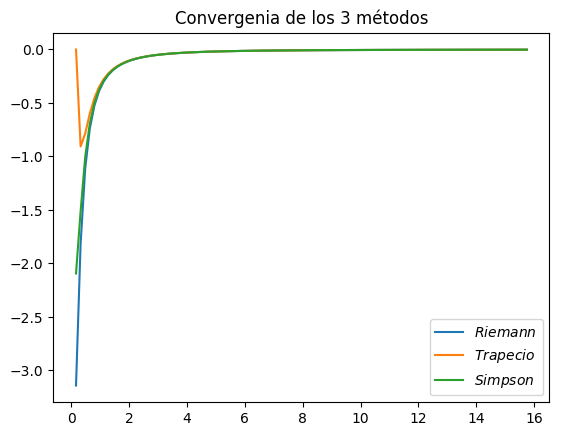

In [31]:
title("Convergenia de los 3 métodos")
n=1:99
#Graficamos los puntos obtenidos con cada uno de los tres métodos contra el inverso de la longitud de los subintervalos
plot(n/2pi,metodo1, label = L"Riemann")  
legend()
plot(n/2pi,metodo2,label = L"Trapecio")
legend()
plot(n/2pi,metodo3,label = L"Simpson")
legend()
show()

Cuando tenemos uns incremento en $\Delta x$, se va haciendo más pequeña, entonces la aproximación de la integral va siendo mejor. Y comparando los 3 métodos podemos apreciar que el más tardado en converger al valor exacto es el método de Riemann.